[View in Colaboratory](https://colab.research.google.com/github/marcelcerri/Hello-world/blob/master/Ajuste_de_modelo_n%C3%A3o_linear.ipynb)

In [0]:
import numpy as np
from scipy.optimize import curve_fit
import io
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt


In [13]:

#carregar o arquivo em csv
uploaded = files.upload()

Saving dados4.csv to dados4 (2).csv


In [14]:
#verificação do upload
for fn in uploaded.keys():
  print('O arquivo "{name}" com tamanho de {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

O arquivo "dados4.csv" com tamanho de 126 bytes


In [0]:
#transformando o arquivo csv em data frame
calibracao_df = pd.read_csv(io.StringIO(uploaded['dados4.csv'].decode('utf-8')))

In [16]:
#impressão do arquivo em data frame
calibracao_df

,eixo x,eixo y
0,0.9,455.2
1,1.5,428.6
2,13.8,124.1
3,19.8,67.3
4,24.1,43.2
5,28.2,28.1
6,35.2,13.1
7,60.3,-0.4
8,74.6,-1.3
9,81.3,-1.5


In [0]:
#transformando data frame em vetor
calibracao_np = calibracao_df.values

In [18]:
#impressão do vetor
calibracao_np

array([[ 9.000e-01,  4.552e+02],
       [ 1.500e+00,  4.286e+02],
       [ 1.380e+01,  1.241e+02],
       [ 1.980e+01,  6.730e+01],
       [ 2.410e+01,  4.320e+01],
       [ 2.820e+01,  2.810e+01],
       [ 3.520e+01,  1.310e+01],
       [ 6.030e+01, -4.000e-01],
       [ 7.460e+01, -1.300e+00],
       [ 8.130e+01, -1.500e+00]])

In [19]:
#vetor do eixo x
x = calibracao_np[:,0]
print(x)

[ 0.9  1.5 13.8 19.8 24.1 28.2 35.2 60.3 74.6 81.3]


In [20]:
#vetor do eixo y
y = calibracao_np[:,1]
print(y)

[ 4.552e+02  4.286e+02  1.241e+02  6.730e+01  4.320e+01  2.810e+01
  1.310e+01 -4.000e-01 -1.300e+00 -1.500e+00]


In [0]:
# Definição do modelo
def func(x, p1,p2):
  return p1 * np.exp(p2 * x) 

In [39]:
# Chamada de curve_fit
popt, pcov = curve_fit(func, x, y, p0=(101,-1))  
p1, p2 = popt

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [40]:
# Impressão dos parâmetros ótimos
print("Optimal parameters are p1=%g, p2=%g" % (p1, p2))

Optimal parameters are p1=498.831, p2=-0.101257


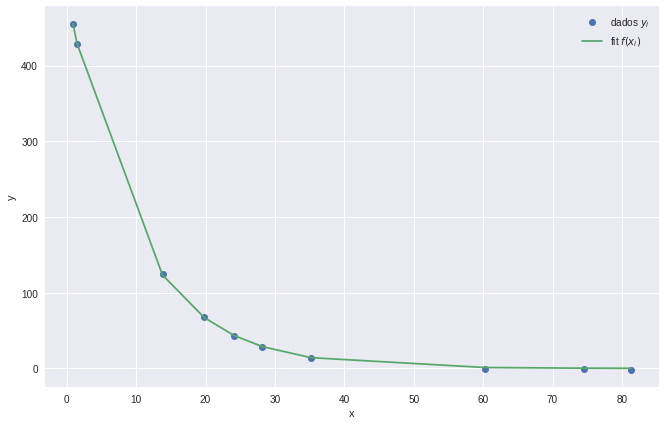

In [41]:
import pylab
yfitted = func(x, *popt)   
pylab.plot(x, y, 'o', label='dados $y_i$')
pylab.plot(x, yfitted, '-', label='fit $f(x_i)$')
pylab.xlabel('x')
pylab.ylabel('y')
pylab.legend()
pylab.show()

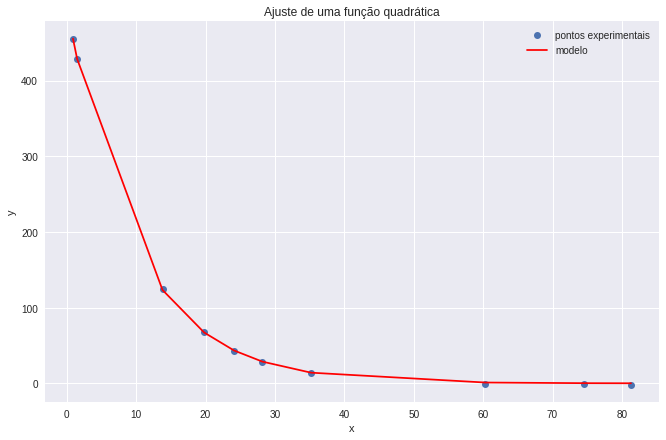

In [42]:
yfitted = func(x, *popt) 
#impressão dos dados experimentais e do modelo 
plt.plot(x, y, "o", label = "pontos experimentais")
plt.plot(x, yfitted, "-r", label = "modelo")
plt.xlabel("x")
plt.ylabel("y")
plt.rcParams['figure.figsize'] = (11,7)
plt.title("Ajuste de uma função quadrática")
plt.legend()
plt.show()